In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Dividend_Yield.csv
/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Earnings.csv
/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_P_E_ratio.csv
/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Revenue.csv
/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Market_Cap.csv


In [2]:
market_cap_df = pd.read_csv('/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Market_Cap.csv')
earnings_df = pd.read_csv('/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Earnings.csv')
revenue_df = pd.read_csv('/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Revenue.csv')
pe_ratio_df = pd.read_csv('/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_P_E_ratio.csv')
dividend_yield_df = pd.read_csv('/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Dividend_Yield.csv')

In [9]:
dividend_yield_df.head(5)

,Rank,Name,Symbol,dividend_yield_ttm,price (GBP),country
0,1,LianBio,LIAN,300940.0,0.243065,United States
1,2,Richter Gedeon,RIG2.F,150430.0,23.726825,Hungary
2,3,Delek Group,DLEKG.TA,117114.0,87.735884,Israel
3,4,LMP Automotive Holdings,LMPX,106250.0,0.121914,United States
4,5,MBIA,MBI,22346.4,2.727817,United States


In [8]:
pe_ratio_df.head(5)

,Rank,Name,Symbol,pe_ratio_ttm,price (GBP),country
0,1,Imperial Petroleum,IMPP,0.109943,3.108797,Greece
1,2,Vertex Energy,VTNR,0.188889,0.092197,United States
2,3,Spin Master,TOY.TO,0.224758,17.414443,Canada
3,4,Performance Shipping,PSHG,0.225293,1.467916,Greece
4,5,TherapeuticsMD,TXMD,0.340956,1.280093,United States


In [7]:
revenue_df.head(5)

,Rank,Name,Symbol,revenue_ttm,price (GBP),country
0,1,Walmart,WMT,665035000000,61.029186,United States
1,2,Amazon,AMZN,604334000000,143.454209,United States
2,3,Saudi Aramco,2222.SR,495354806850,5.505405,Saudi Arabia
3,4,Sinopec,600028.SS,435696880608,0.748295,China
4,5,PetroChina,601857.SS,429671599508,0.969769,China


In [5]:
earnings_df.head(5)

,Rank,Name,Symbol,earnings_ttm,price (GBP),country
0,1,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia
1,2,Apple,AAPL,1.216250e+11,176.734336,United States
2,3,Microsoft,MSFT,1.077870e+11,326.461762,United States
3,4,Alphabet (Google),GOOG,1.018210e+11,126.279631,United States
4,5,Berkshire Hathaway,BRK-B,8.890400e+10,347.625201,United States


In [6]:
market_cap_df.head(5)

,Rank,Name,Symbol,marketcap,price (GBP),country
0,1,Apple,AAPL,2.689903e+12,176.919492,United States
1,2,Microsoft,MSFT,2.427170e+12,326.537958,United States
2,3,NVIDIA,NVDA,2.259353e+12,92.105725,United States
3,4,Alphabet (Google),GOOG,1.549815e+12,126.458691,United States
4,5,Amazon,AMZN,1.506038e+12,143.492307,United States


In [26]:


combined_data = (
    pd.merge(revenue_df, earnings_df, on=["Name", "Symbol", "country"], suffixes=('_revenue', '_earnings'))
    .merge(market_cap_df, on=["Name", "Symbol", "country"], suffixes=('', '_marketcap'))
    .merge(pe_ratio_df, on=["Name", "Symbol", "country"], suffixes=('', '_pe_ratio'))
    .merge(dividend_yield_df, on=["Name", "Symbol", "country"], suffixes=('', '_dividend_yield'))
)

combined_data = combined_data.fillna({col: 0 for col in combined_data.columns if col.startswith('ttm')})

top_15_companies = combined_data.sort_values('Rank').head(15)

# Summary statistics for overall analysis
summary_stats = combined_data.agg(
    total_companies=('Name', 'size'),
    avg_revenue=('revenue_ttm', 'mean'),
    avg_earnings=('earnings_ttm', 'mean'),
    avg_marketcap=('marketcap', 'mean'),
    avg_pe_ratio=('pe_ratio_ttm', 'mean'),
    avg_dividend_yield=('dividend_yield_ttm', 'mean')
)

# Print summary statistics
print(summary_stats)

                      Name   revenue_ttm  earnings_ttm     marketcap  \
total_companies     9912.0           NaN           NaN           NaN   
avg_revenue            NaN  5.708766e+09           NaN           NaN   
avg_earnings           NaN           NaN  7.112681e+08           NaN   
avg_marketcap          NaN           NaN           NaN  8.742851e+09   
avg_pe_ratio           NaN           NaN           NaN           NaN   
avg_dividend_yield     NaN           NaN           NaN           NaN   

                    pe_ratio_ttm  dividend_yield_ttm  
total_companies              NaN                 NaN  
avg_revenue                  NaN                 NaN  
avg_earnings                 NaN                 NaN  
avg_marketcap                NaN                 NaN  
avg_pe_ratio       -3.262565e+14                 NaN  
avg_dividend_yield           NaN          240.548787  


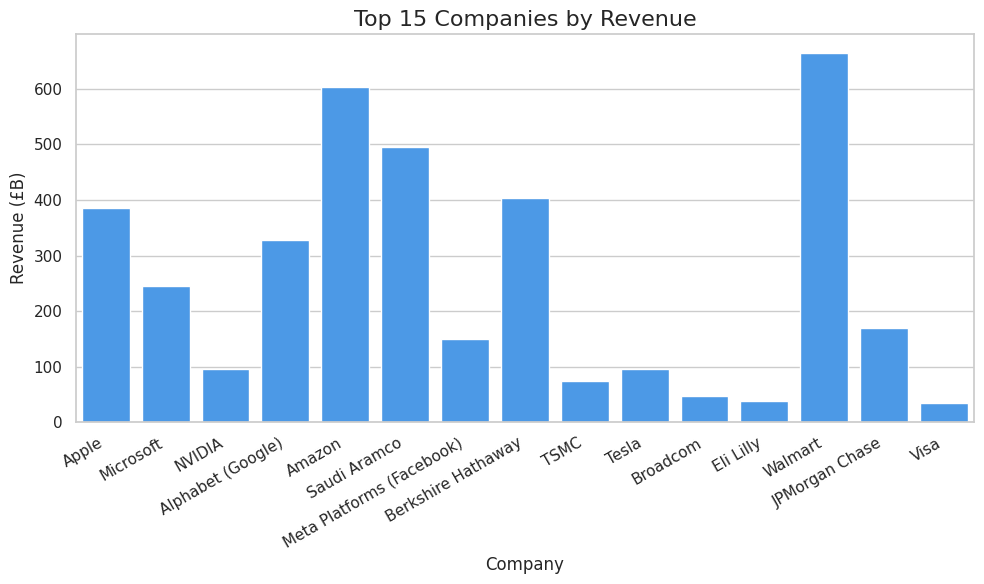

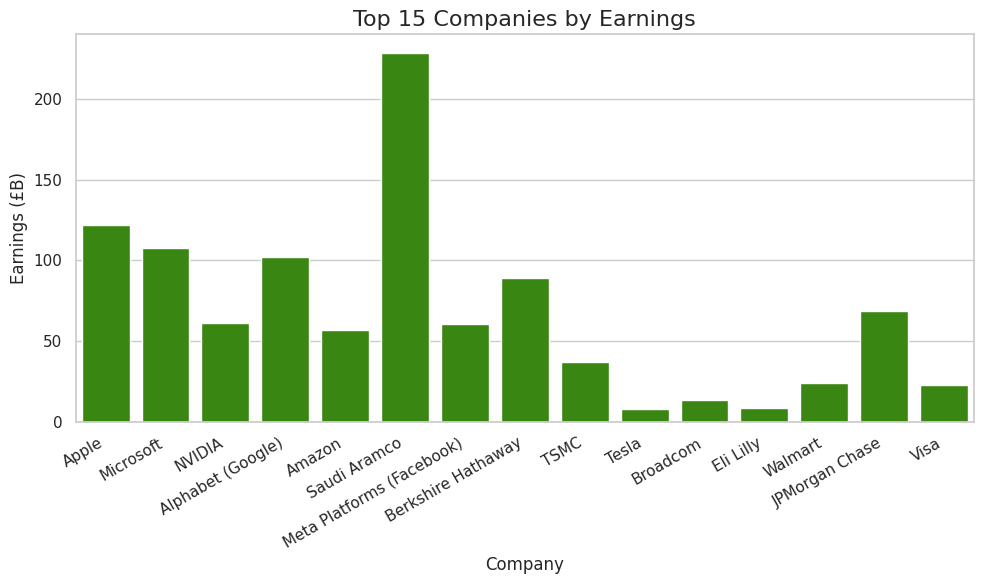

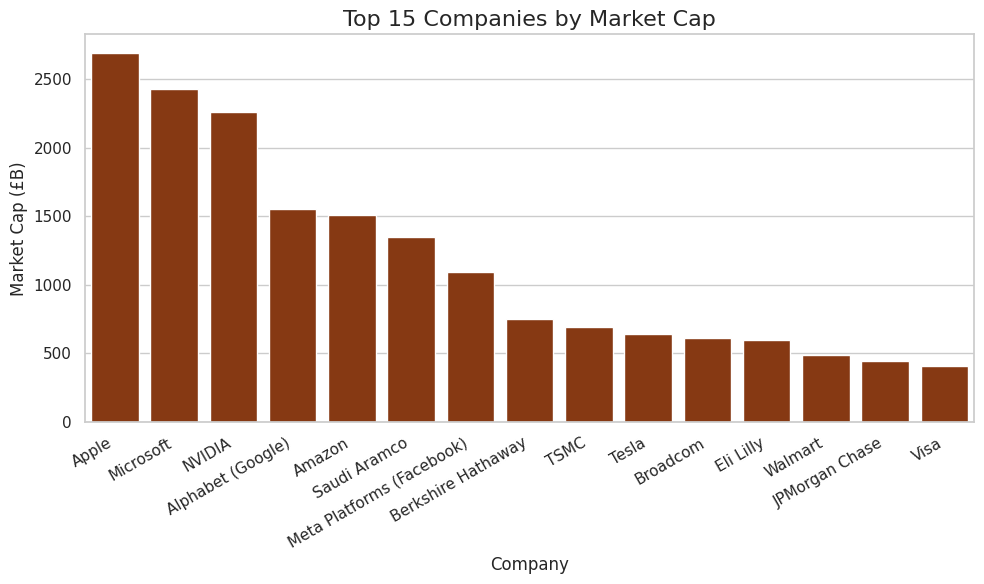

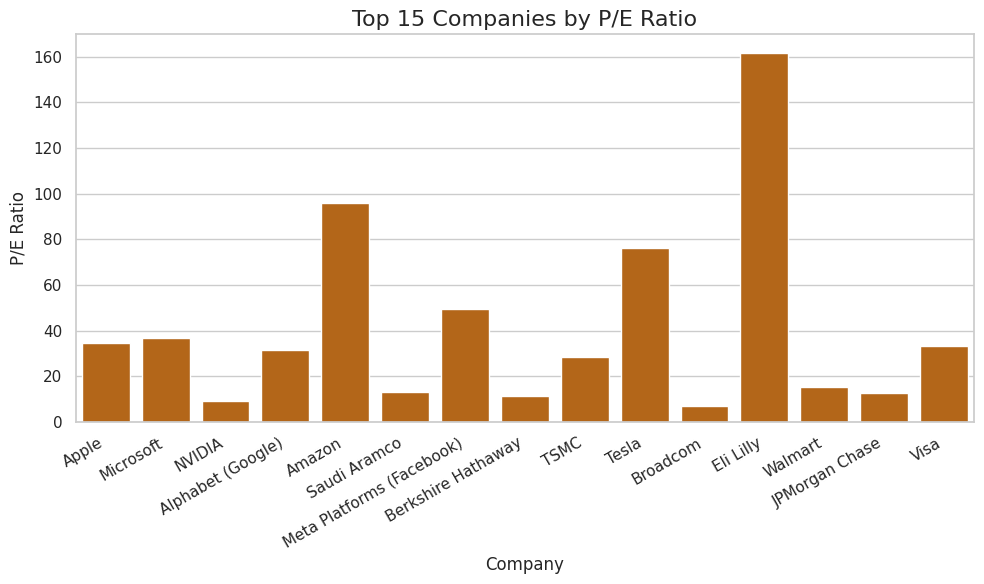

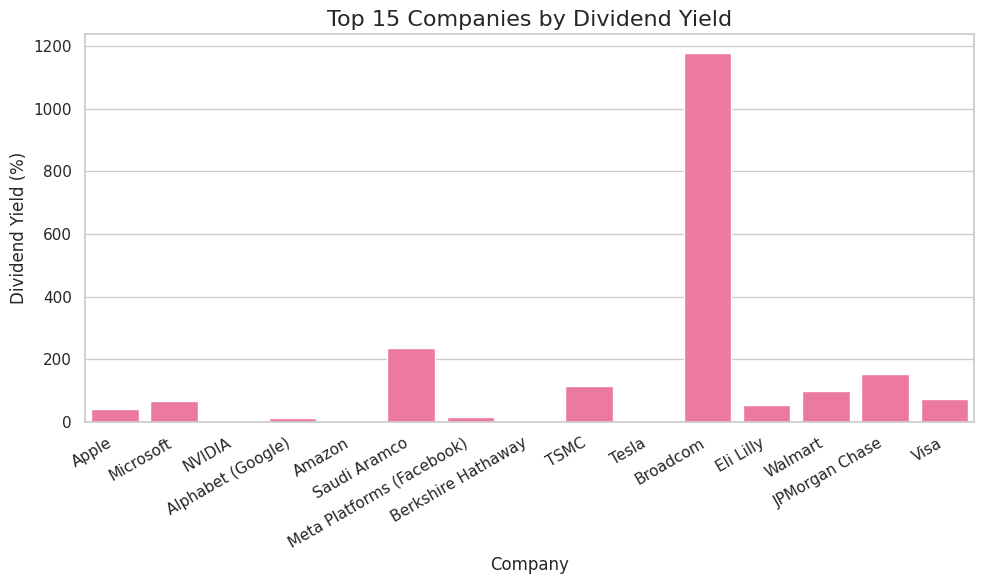

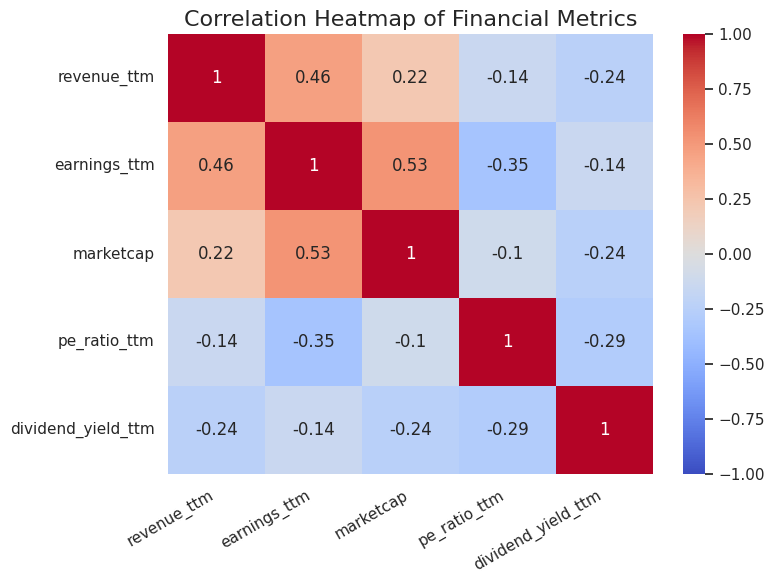

In [28]:

# Set seaborn style
sns.set(style="whitegrid")

# Function to create bar plot
def create_bar_plot(data, x, y, title, xlabel, ylabel, color, rotation=30):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=data, color=color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()

# Bar Plot: Top 15 Companies by Revenue
create_bar_plot(top_15_companies, 'Name', top_15_companies['revenue_ttm'] / 1e9, 
                "Top 15 Companies by Revenue", "Company", "Revenue (£B)", "#3399ff")

# Bar Plot: Top 15 Companies by Earnings
create_bar_plot(top_15_companies, 'Name', top_15_companies['earnings_ttm'] / 1e9, 
                "Top 15 Companies by Earnings", "Company", "Earnings (£B)", "#339900")

# Bar Plot: Top 15 Companies by Market Cap
create_bar_plot(top_15_companies, 'Name', top_15_companies['marketcap'] / 1e9, 
                "Top 15 Companies by Market Cap", "Company", "Market Cap (£B)", "#993300")

# Bar Plot: Top 15 Companies by P/E Ratio
create_bar_plot(top_15_companies, 'Name', top_15_companies['pe_ratio_ttm'], 
                "Top 15 Companies by P/E Ratio", "Company", "P/E Ratio", "#cc6600")

# Bar Plot: Top 15 Companies by Dividend Yield
create_bar_plot(top_15_companies, 'Name', top_15_companies['dividend_yield_ttm'], 
                "Top 15 Companies by Dividend Yield", "Company", "Dividend Yield (%)", "#ff6699")

# Calculate correlation matrix
corr_matrix = top_15_companies[['revenue_ttm', 'earnings_ttm', 'marketcap', 'pe_ratio_ttm', 'dividend_yield_ttm']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Financial Metrics", fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

# Show all the plots
plt.show()


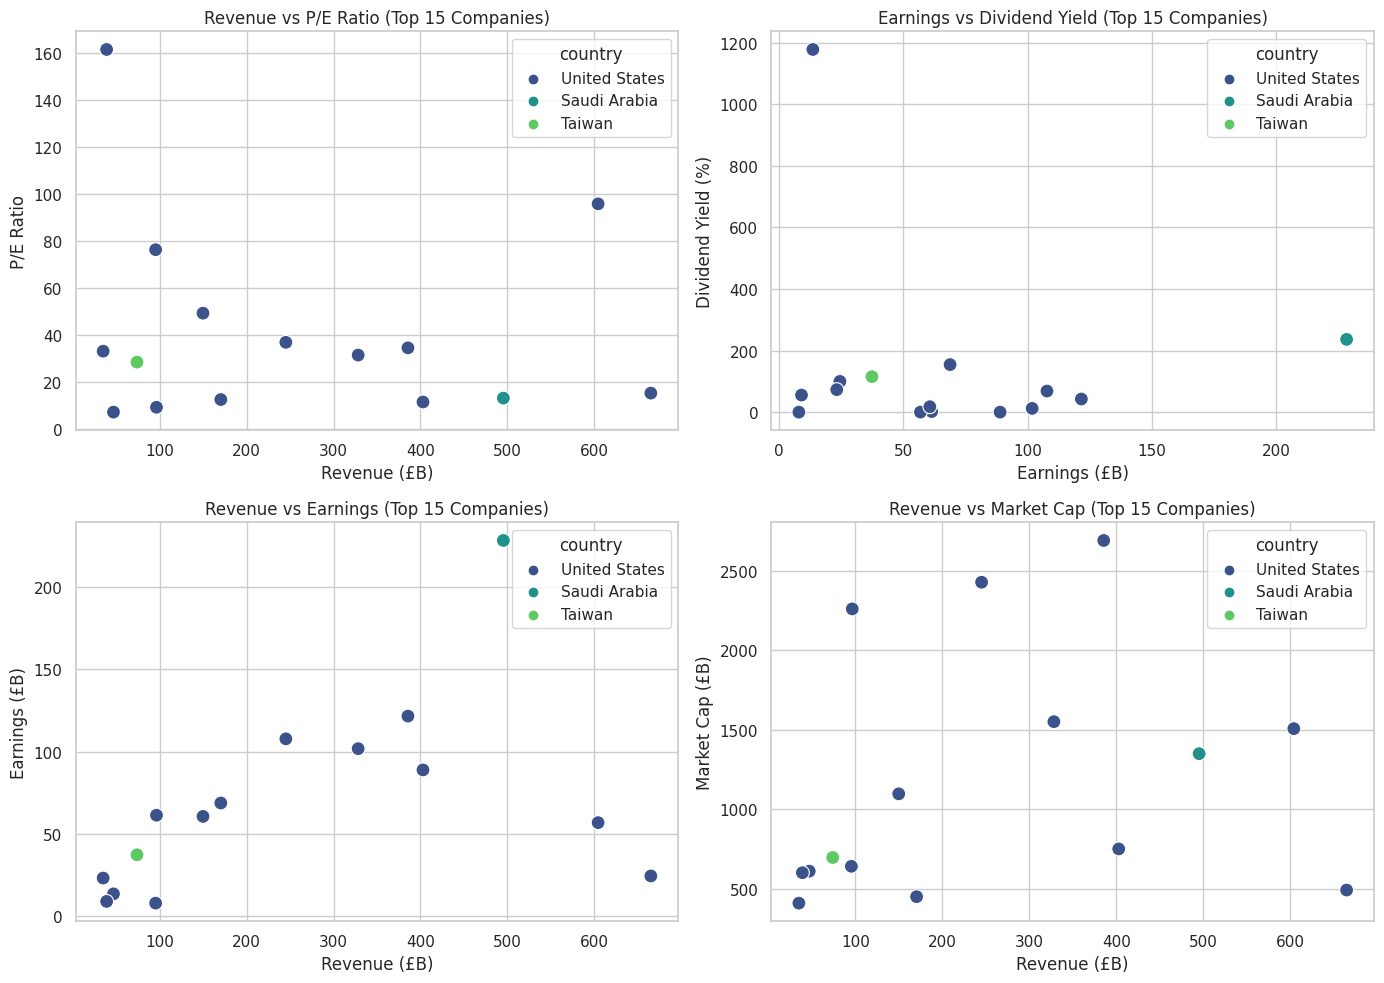

In [29]:

# Create the figure and axes for 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter Plot 1: Revenue vs P/E Ratio
sns.scatterplot(
    ax=axes[0, 0], x=top_15_companies['revenue_ttm'] / 1e9, y=top_15_companies['pe_ratio_ttm'], 
    hue=top_15_companies['country'], s=100, palette='viridis'
)
axes[0, 0].set_title("Revenue vs P/E Ratio (Top 15 Companies)")
axes[0, 0].set_xlabel("Revenue (£B)")
axes[0, 0].set_ylabel("P/E Ratio")

# Scatter Plot 2: Earnings vs Dividend Yield
sns.scatterplot(
    ax=axes[0, 1], x=top_15_companies['earnings_ttm'] / 1e9, y=top_15_companies['dividend_yield_ttm'], 
    hue=top_15_companies['country'], s=100, palette='viridis'
)
axes[0, 1].set_title("Earnings vs Dividend Yield (Top 15 Companies)")
axes[0, 1].set_xlabel("Earnings (£B)")
axes[0, 1].set_ylabel("Dividend Yield (%)")

# Scatter Plot 3: Revenue vs Earnings
sns.scatterplot(
    ax=axes[1, 0], x=top_15_companies['revenue_ttm'] / 1e9, y=top_15_companies['earnings_ttm'] / 1e9, 
    hue=top_15_companies['country'], s=100, palette='viridis'
)
axes[1, 0].set_title("Revenue vs Earnings (Top 15 Companies)")
axes[1, 0].set_xlabel("Revenue (£B)")
axes[1, 0].set_ylabel("Earnings (£B)")

# Scatter Plot 4: Revenue vs Market Cap
sns.scatterplot(
    ax=axes[1, 1], x=top_15_companies['revenue_ttm'] / 1e9, y=top_15_companies['marketcap'] / 1e9, 
    hue=top_15_companies['country'], s=100, palette='viridis'
)
axes[1, 1].set_title("Revenue vs Market Cap (Top 15 Companies)")
axes[1, 1].set_xlabel("Revenue (£B)")
axes[1, 1].set_ylabel("Market Cap (£B)")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


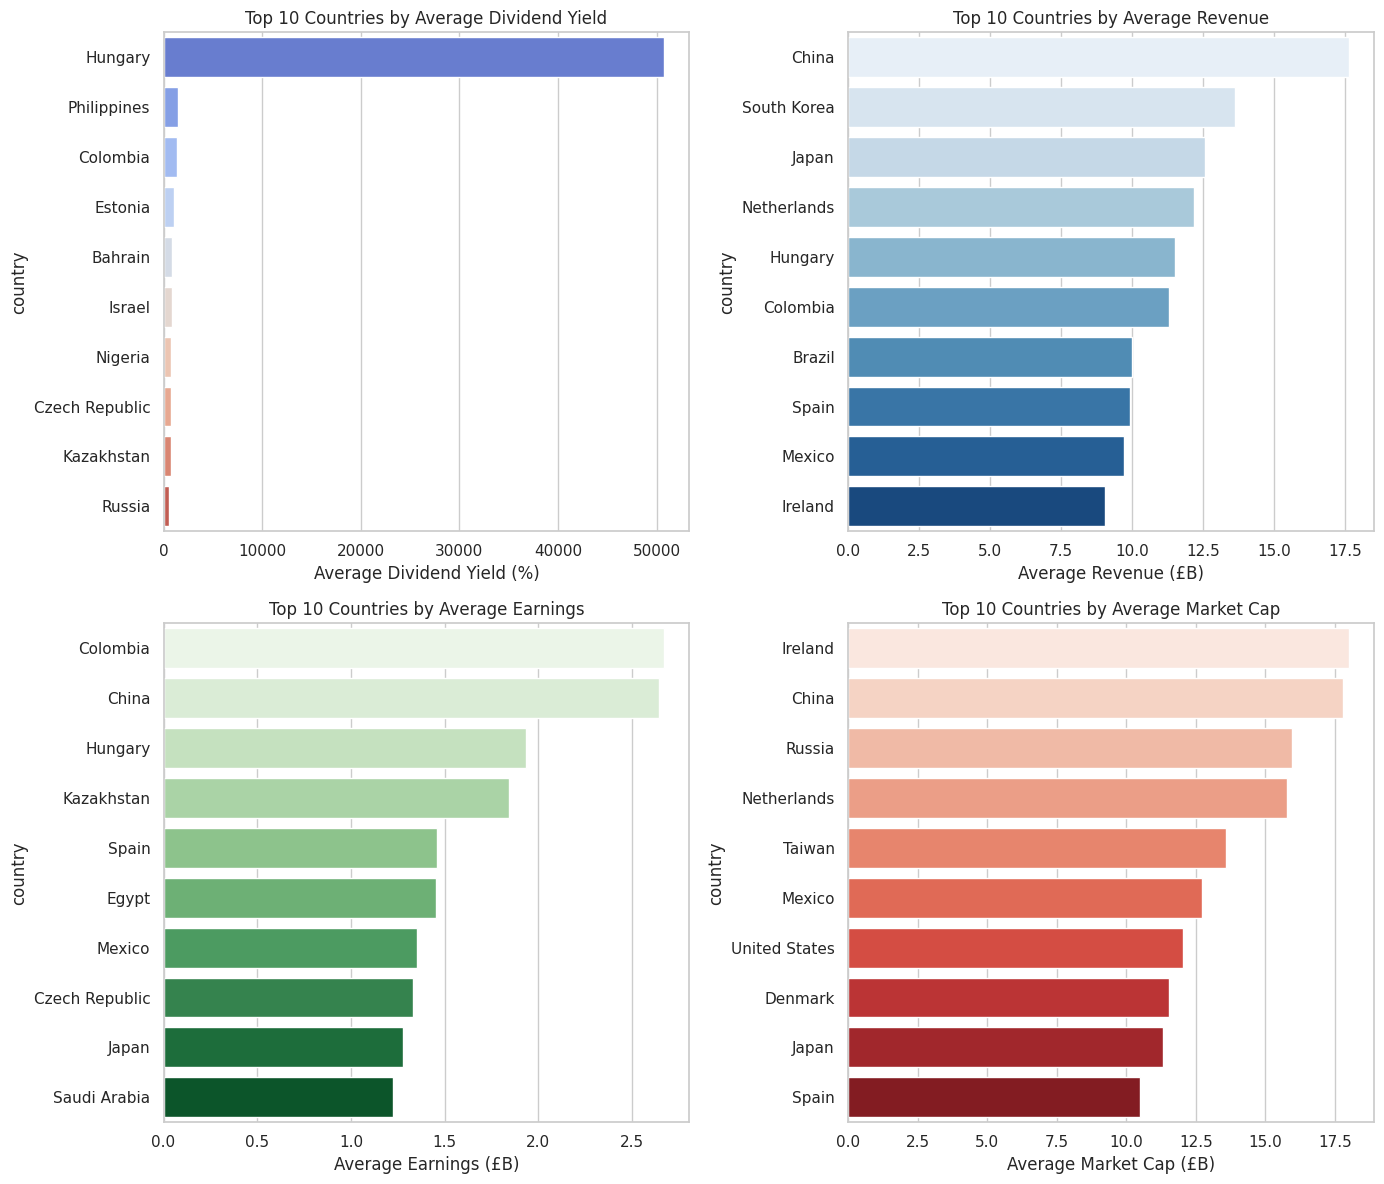

In [30]:


# Group and summarize data by country
country_summary = combined_data.groupby('country').agg(
    avg_revenue=('revenue_ttm', 'mean'),
    avg_earnings=('earnings_ttm', 'mean'),
    avg_marketcap=('marketcap', 'mean'),
    avg_pe_ratio=('pe_ratio_ttm', 'mean'),
    avg_dividend_yield=('dividend_yield_ttm', 'mean'),
    company_count=('country', 'size')
).reset_index()

# Sort data for top 10 countries by different metrics
top_countries_by_div_yield = country_summary.nlargest(10, 'avg_dividend_yield')
top_countries_by_revenue = country_summary.nlargest(10, 'avg_revenue')
top_countries_by_earnings = country_summary.nlargest(10, 'avg_earnings')
top_countries_by_marketcap = country_summary.nlargest(10, 'avg_marketcap')

# Create the figure and axes for 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Top 10 Countries by Average Dividend Yield
sns.barplot(ax=axes[0, 0], y=top_countries_by_div_yield['country'], 
            x=top_countries_by_div_yield['avg_dividend_yield'], 
            palette='coolwarm', orient='h')
axes[0, 0].set_title("Top 10 Countries by Average Dividend Yield")
axes[0, 0].set_xlabel("Average Dividend Yield (%)")

# Plot 2: Top 10 Countries by Average Revenue
sns.barplot(ax=axes[0, 1], y=top_countries_by_revenue['country'], 
            x=top_countries_by_revenue['avg_revenue'] / 1e9, 
            palette='Blues', orient='h')
axes[0, 1].set_title("Top 10 Countries by Average Revenue")
axes[0, 1].set_xlabel("Average Revenue (£B)")

# Plot 3: Top 10 Countries by Average Earnings
sns.barplot(ax=axes[1, 0], y=top_countries_by_earnings['country'], 
            x=top_countries_by_earnings['avg_earnings'] / 1e9, 
            palette='Greens', orient='h')
axes[1, 0].set_title("Top 10 Countries by Average Earnings")
axes[1, 0].set_xlabel("Average Earnings (£B)")

# Plot 4: Top 10 Countries by Average Market Cap
sns.barplot(ax=axes[1, 1], y=top_countries_by_marketcap['country'], 
            x=top_countries_by_marketcap['avg_marketcap'] / 1e9, 
            palette='Reds', orient='h')
axes[1, 1].set_title("Top 10 Countries by Average Market Cap")
axes[1, 1].set_xlabel("Average Market Cap (£B)")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


Correlation between Revenue and Earnings: 0.46
Correlation between Revenue and Market Cap: 0.22


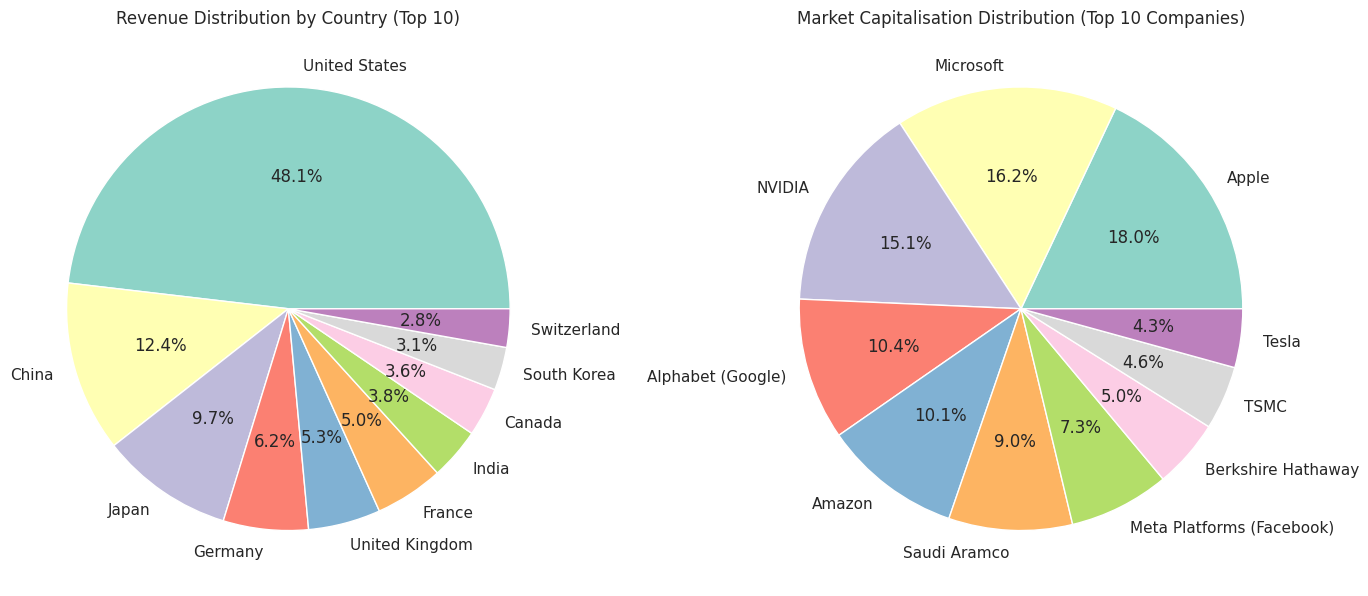

In [31]:

# Correlation Analysis
correlation_revenue_earnings = np.corrcoef(top_15_companies['revenue_ttm'], top_15_companies['earnings_ttm'])[0, 1]
correlation_revenue_marketcap = np.corrcoef(top_15_companies['revenue_ttm'], top_15_companies['marketcap'])[0, 1]

print(f"Correlation between Revenue and Earnings: {round(correlation_revenue_earnings, 2)}")
print(f"Correlation between Revenue and Market Cap: {round(correlation_revenue_marketcap, 2)}")

# Summarize total revenue by country and calculate percentages
revenue_by_country = (combined_data.groupby('country')['revenue_ttm']
                      .sum()
                      .reset_index()
                      .sort_values('revenue_ttm', ascending=False)
                      .head(10))
revenue_by_country['percentage'] = revenue_by_country['revenue_ttm'] / revenue_by_country['revenue_ttm'].sum() * 100

# Pie Chart: Revenue Distribution by Country (Top 10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(revenue_by_country['revenue_ttm'], labels=revenue_by_country['country'], autopct='%1.1f%%', colors=sns.color_palette("Set3"))
ax1.set_title("Revenue Distribution by Country (Top 10)")

# Top 10 Companies by Market Cap
top_10_marketcap = (combined_data.sort_values('marketcap', ascending=False)
                    .head(10))
top_10_marketcap['percentage'] = top_10_marketcap['marketcap'] / top_10_marketcap['marketcap'].sum() * 100

# Pie Chart: Market Capitalisation Distribution (Top 10 Companies)
ax2.pie(top_10_marketcap['marketcap'], labels=top_10_marketcap['Name'], autopct='%1.1f%%', colors=sns.color_palette("Set3"))
ax2.set_title("Market Capitalisation Distribution (Top 10 Companies)")

# Show plots
plt.tight_layout()
plt.show()
